
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns()
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

&nbsp; e) Find all rows where the freetime is NaN.   

&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

In [669]:
# 1.a)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from data_utils import barplot
pd.options.mode.copy_on_write = True

df = pd.read_csv("../Data/student-mat-missing-data.csv")

In [670]:
# 1.d)
# barplot(df)

In [671]:
# 1.e)

freetime = df["freetime"]
freetime = freetime[freetime.isna()]
indices = []
for index in freetime.index:
    indices.append(int(index))
# print(f"All indices (rows) in the column \"freetime\" that contains NaN are:\n{indices}")

In [672]:
# 1.f)

freeage = df[["freetime", "age"]]
freeage = freeage["freetime"].isna() | freeage["age"].isna()
freeage = freeage[freeage == True]
indices = []
for index in freeage.index:
    indices.append(int(index))
# print(f"All indices (rows) that contains NaN in either the column \"freetime\" or \"age\":\n{indices}")

In [673]:
# 1.g)

na_rows = df.isna().sum(axis=1)
na_rows = na_rows[na_rows > 1]
na_rows = len(na_rows)      # na_rows = na_rows.shape[0]
col = int(df.iloc[:, 0].count())
# print(f"Number of rows that contains more than 1 NaN value constitutes: {(na_rows / col) * 100:.2f} % of the dataframe.")

---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let"s see which unique values it can have. 

&nbsp; e) Let"s see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(["Unnamed: 0", "school", "sex", "age", "address", "famsize", "Pstatus",
       "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime",
       "studytime", "failures", "schoolsup", "famsup", "paid", "activities",
       "nursery", "higher", "internet", "romantic", "famrel", "freetime",
       "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"],
      dtype="object")
```

d)

```python

array(["yes", "no"], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

In [674]:
# 2.b)

def E01_2_b():
    age = df["age"]
    x = age.unique()
    y = age.count()
    sns.histplot(data=age, color="midnightblue", discrete=True)
    plt.title("Discrete histogram of values counts in column \"age\"\n", fontweight="bold")
    plt.show()


# E01_2_b

In [675]:
# 2.c)
# print(df.columns)

In [676]:
# 2.d)
# sns.histplot(df["higher"], discrete=True)
# plt.show()

In [677]:
# 2.e)

def E01_2_e():
    age = df["age"]
    age_yes = df[["age", "higher"]]
    age_yes = age_yes.loc[age_yes["higher"] == "yes", "age"]
    age_no = df[["age", "higher"]]
    age_no = age_no.loc[age_no["higher"] == "no", "age"]
    sns.histplot(data=age, color="midnightblue", discrete=True, label="age in total", zorder=2)
    sns.histplot(data=age_yes, color="darkred", discrete=True, label="age where higher is yes", zorder=2)
    sns.histplot(data=age_no, color="forestgreen", discrete=True, label="age where higher is no", zorder=2)
    plt.grid(axis="y", zorder=1)
    plt.legend()
    plt.show()


# E01_2_e()

In [678]:
# 2.f)

df["alcohol"] = df["Dalc"] + df["Walc"]

In [679]:
# 2.g)

def E01_2_g():
    sns.barplot(data=df, x="age", y="alcohol", hue="age", palette="Set1", legend=False, zorder=2)#, errorbar=None)
    plt.title("Barplot of alcohol consumption per age\n", fontweight="bold")
    plt.grid(axis="y", zorder=1)
    plt.show()


# E01_2_g()
# sns.histplot(df, x="age", hue="age", palette="Set1", legend=False, discrete=True)
# plt.show()

In [680]:
# 2.h)

df = df.drop(df[df['age'] > 18].index)
df.loc[df["age"].isna() & (df["alcohol"] >= 4), "age"] = 17
df.loc[df["age"].isna() & (df["alcohol"] < 4), "age"] = 15
df["age"] = df["age"].astype(int)

def E01_2_h():
    sns.barplot(data=df, x="age", y="alcohol", hue="age", palette="Set1", legend=False, zorder=2)#, errorbar=None)
    plt.title("Barplot of alcohol consumption per age\n", fontweight="bold")
    plt.grid(axis="y", zorder=1)
    plt.show()


# E01_2_h()
# sns.histplot(df, x="age", hue="age", palette="Set1", legend=False, discrete=True)
# plt.show()

---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

In [681]:
# cleaning other NaN's first
na = df.isna().any(axis=0)
na = df.loc[:, na]
k:str = na.columns.tolist()                     # vilka kolumner som innehåller NaN
v:list = [int(df[x].isna().sum()) for x in k]   # hur många NaN varje kolumn innehåller
df = df.dropna(subset=k, how="all")             # eftersom alla kolumner i k numrerade 5 så påverkar de inte datan i stort om de rensas

# changing to numerical values
# df["activities"] = df["activities"].map({"no": 0, "yes": 1})        # instead of .replace() which gave a futurewarning when I used several values in brackets
# df

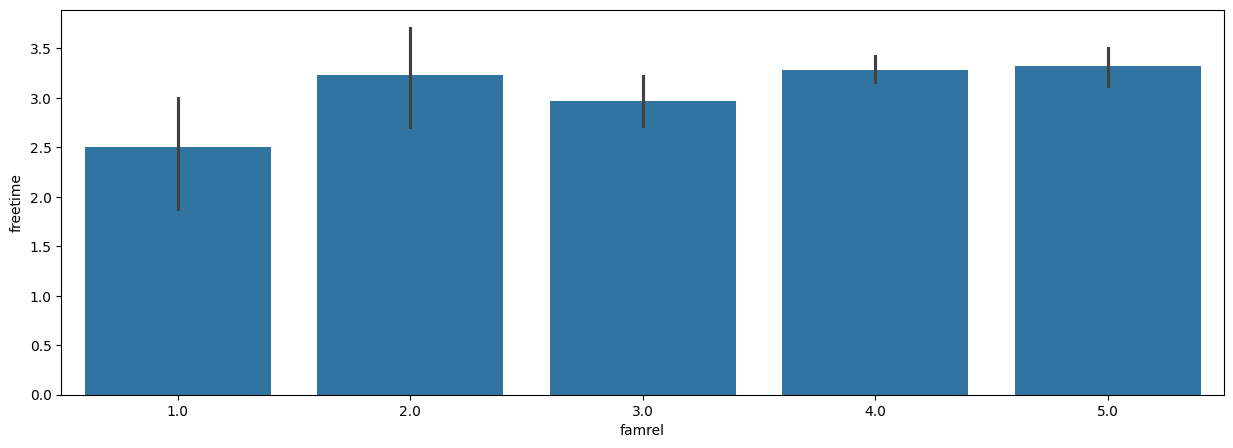

In [684]:
indices                     # All indices (rows) in the column "freetime" that contains NaN
# freetime - how much freetime they have after school, 1 = little, 5 = alot
#
# direkt relaterade kolumner:
# activities, goout, abscences, G3
# 
# löst relaterade kolumner: 
# sex, age, traveltime, studytime, higher, famrel

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="famrel", y="freetime")
plt.show()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---